In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
data = pd.read_csv('data_titanic_proyecto.csv')

In [3]:
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [4]:
#feature enginering
sex = np.zeros(len(data))
sex[data['passenger_sex']== 'M'] = 1
sex[data['passenger_sex']== 'F'] = 0
data['passenger_sex'] = sex

data.head()


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,1.0,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,0.0,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,0.0,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,0.0,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,1.0,N


In [5]:
clase = np.zeros(len(data))
clase[data['passenger_class']== 'Lower'] = 0
clase[data['passenger_class']== 'Upper'] = 1
data['passenger_class'] = clase
survived = np.zeros(len(data))
survived[data['passenger_survived']== 'N'] = 0
survived[data['passenger_survived']== 'Y'] = 1
data['passenger_survived'] = survived
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1.0,0.0,1.0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0


In [6]:

data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(data))
Embarked[data['Embarked']== 'C'] = 1
Embarked[data['Embarked']== 'Q'] = 2
Embarked[data['Embarked']== 'S'] = 3
data['Embarked'] = Embarked
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,3.0,0.0,1.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,1.0,0.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,0.0,0.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.0,1.0,0.0,1.0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,3.0,0.0,1.0,0.0


In [7]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
#age = np.zeros(len(data))
#age[data['Age']<20] = 1
#age[(data['Age']>=20)&(train['Age']<60)] = 2
#age[(data['Age']>=60)] = 3
#data['Age'] = age
data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,3.0,0.0,1.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,1.0,0.0,1.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,0.0,0.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.0,1.0,0.0,1.0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,3.0,0.0,1.0,0.0


In [8]:
eliminar = ['PassengerId','Name', 'Ticket','Cabin']
data.drop(eliminar,axis=1, inplace=True)
data.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,22.0,1,0,7.2500,3.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,1.0,0.0,1.0
2,26.0,0,0,7.9250,3.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,3.0,1.0,0.0,1.0
4,35.0,0,0,8.0500,3.0,0.0,1.0,0.0


In [9]:
#feature selection age 
x = data.iloc[:,0:7]  
y = data.iloc[:,-1] 

In [10]:
#separacion datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.30, random_state=42)


In [11]:
train = X_train.copy()
train["y"] = y_train
train
def pc():
    counts = train["y"].value_counts().to_dict()
    priors = {(k, v/len(y_train)) for k, v in counts.items()}
    return priors
pc()

{(0.0, 0.6193029490616622), (1.0, 0.3806970509383378)}

In [12]:
import math
def mediaVarianza():
    media_varianza = {}
    for c in train["y"].unique():
        filtro= train[(train['y'] == c)]
        mv = {}
        for xi in ["Age","SibSp","Parch","Fare","Embarked","passenger_class","passenger_sex"]:
            mv[xi] = []
            mv[xi].append(filtro[xi].mean())
            mv[xi].append(
                math.pow(filtro[xi].std(), 2))
        media_varianza[c] = mv
    return media_varianza
media_varianza = mediaVarianza()
def pdf(x, media, varianza):
    e = math.exp(-(math.pow(x - media, 2) / (2 * varianza)))
    return (1 / (math.sqrt(2 * math.pi * varianza))) * e


In [217]:

def predict():
    predictions = {}
    for _, row in X_test.iterrows():
        results = {}
        for k, v in pc():
            p = 0
            for xi in ["Age","SibSp","Parch","Fare","Embarked","passenger_class","passenger_sex"]:
                prob = pdf(row[xi], media_varianza[k][xi][0], media_varianza[k][xi][1])
                if prob > 0:
                    p += math.log(prob)
            results[k] = math.log(v) + p
        predictions[_] = max([key for key in results.keys() if results[key] == results[max(results, key=results.get)]])
    return predictions


In [218]:
def accurracy(predictions):
    correct = 0
    for i, t in X_test.iterrows():
        if y_test[i] == predictions[i]:
            correct += 1
    return (correct / len(X_test)) * 100.0
accurracy(predict())

79.27170868347339

In [214]:
#onehotcoding
a = np.unique(y_train, return_inverse=1)[1]
Y = (a.ravel()[:,None] == np.arange(a.max()+1)).astype(int)



In [16]:
m,n = X_train.shape
epochs = 1000
tf.reset_default_graph()
with tf.name_scope('datos_entrenamiento'):
    x = tf.placeholder(tf.float32, [None, n], name = "X") 
    y = tf.placeholder(tf.float32, [None, 2], name = "Y") 
with tf.name_scope('parametros'):
    W = tf.Variable(tf.zeros([n,2]), name = "W") 
    b = tf.Variable(tf.zeros([2]), name = "B")
with tf.name_scope('modelo'):
    y_ = tf.matmul(x, W) + b
    prediction = tf.nn.sigmoid(y_)
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( logits = y_, labels = y))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy) 
    #tf.summary.scalar('cost',cross_entropy)
with tf.name_scope('accuracy'):
    correct_prediction = tf.to_float(tf.greater(prediction, 0.5))
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(y, correct_prediction)))
    #tf.summary.scalar('accuracy',accuracy)

#summaries = tf.summary.merge_all()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [41]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_size = 10
    batchs = int(np.around(len(X_train)/batch_size))
    batchs
    for i in range(epochs):
        i0 = 0
        i1 = batch_size-1
        for batch in range(batchs):
            x_batch = X_train[i0:i1]
            y_batch = Y[i0:i1]
            optimizer,cost,accuracy_ = sess.run([train_step, cross_entropy,accuracy], feed_dict={x: x_batch,
                                           y: y_batch})
            if batch%10==0:
                print ('Epoch: ',i,'Batch:' ,batch, ' accuracy: ', accuracy_,' cost:',cost)
            i0 = i0+batch_size
            i1 = i1+batch_size


    #print ("Train Accuracy:", sess.run(accuracy, feed_dict={x: X_train, y: y_train}))

    save_path = saver.save(sess, "session.ckpt")
#summary_writer.close()

Epoch:  0 Batch: 0  accuracy:  0.5  cost: 0.6931472
Epoch:  0 Batch: 10  accuracy:  0.5555556  cost: 0.6979588
Epoch:  0 Batch: 20  accuracy:  0.44444445  cost: 2.0014126
Epoch:  0 Batch: 30  accuracy:  0.22222222  cost: 1.0930656
Epoch:  1 Batch: 0  accuracy:  0.7777778  cost: 0.6894379
Epoch:  1 Batch: 10  accuracy:  0.5555556  cost: 0.6915933
Epoch:  1 Batch: 20  accuracy:  0.44444445  cost: 1.9428014
Epoch:  1 Batch: 30  accuracy:  0.22222222  cost: 1.08163
Epoch:  2 Batch: 0  accuracy:  0.7777778  cost: 0.6902676
Epoch:  2 Batch: 10  accuracy:  0.5555556  cost: 0.6841626
Epoch:  2 Batch: 20  accuracy:  0.44444445  cost: 1.9412649
Epoch:  2 Batch: 30  accuracy:  0.22222222  cost: 1.071535
Epoch:  3 Batch: 0  accuracy:  0.7777778  cost: 0.6898905
Epoch:  3 Batch: 10  accuracy:  0.5555556  cost: 0.67702794
Epoch:  3 Batch: 20  accuracy:  0.44444445  cost: 1.9389572
Epoch:  3 Batch: 30  accuracy:  0.22222222  cost: 1.0620255
Epoch:  4 Batch: 0  accuracy:  0.7777778  cost: 0.68849766
E

Epoch:  38 Batch: 10  accuracy:  0.5555556  cost: 0.5936063
Epoch:  38 Batch: 20  accuracy:  0.44444445  cost: 1.7643723
Epoch:  38 Batch: 30  accuracy:  0.33333334  cost: 0.92828625
Epoch:  39 Batch: 0  accuracy:  0.44444445  cost: 1.565845
Epoch:  39 Batch: 10  accuracy:  0.5555556  cost: 0.5916256
Epoch:  39 Batch: 20  accuracy:  0.44444445  cost: 1.7676739
Epoch:  39 Batch: 30  accuracy:  0.33333334  cost: 0.9263514
Epoch:  40 Batch: 0  accuracy:  0.44444445  cost: 1.5699445
Epoch:  40 Batch: 10  accuracy:  0.5555556  cost: 0.58969665
Epoch:  40 Batch: 20  accuracy:  0.44444445  cost: 1.7710901
Epoch:  40 Batch: 30  accuracy:  0.33333334  cost: 0.9244058
Epoch:  41 Batch: 0  accuracy:  0.44444445  cost: 1.5740076
Epoch:  41 Batch: 10  accuracy:  0.5555556  cost: 0.58781487
Epoch:  41 Batch: 20  accuracy:  0.44444445  cost: 1.7745987
Epoch:  41 Batch: 30  accuracy:  0.33333334  cost: 0.922451
Epoch:  42 Batch: 0  accuracy:  0.44444445  cost: 1.5780163
Epoch:  42 Batch: 10  accuracy:

Epoch:  73 Batch: 20  accuracy:  0.44444445  cost: 1.8655858
Epoch:  73 Batch: 30  accuracy:  0.33333334  cost: 0.8598201
Epoch:  74 Batch: 0  accuracy:  0.44444445  cost: 1.6471784
Epoch:  74 Batch: 10  accuracy:  0.5555556  cost: 0.5326831
Epoch:  74 Batch: 20  accuracy:  0.44444445  cost: 1.8667128
Epoch:  74 Batch: 30  accuracy:  0.33333334  cost: 0.8579358
Epoch:  75 Batch: 0  accuracy:  0.44444445  cost: 1.6467348
Epoch:  75 Batch: 10  accuracy:  0.5555556  cost: 0.5307522
Epoch:  75 Batch: 20  accuracy:  0.44444445  cost: 1.8676813
Epoch:  75 Batch: 30  accuracy:  0.33333334  cost: 0.8560579
Epoch:  76 Batch: 0  accuracy:  0.44444445  cost: 1.6460137
Epoch:  76 Batch: 10  accuracy:  0.5555556  cost: 0.5287629
Epoch:  76 Batch: 20  accuracy:  0.44444445  cost: 1.8684853
Epoch:  76 Batch: 30  accuracy:  0.33333334  cost: 0.8541867
Epoch:  77 Batch: 0  accuracy:  0.44444445  cost: 1.6449946
Epoch:  77 Batch: 10  accuracy:  0.5555556  cost: 0.52670926
Epoch:  77 Batch: 20  accuracy:

Epoch:  108 Batch: 20  accuracy:  0.44444445  cost: 1.7774386
Epoch:  108 Batch: 30  accuracy:  0.44444445  cost: 0.7972871
Epoch:  109 Batch: 0  accuracy:  0.44444445  cost: 1.4184469
Epoch:  109 Batch: 10  accuracy:  0.6666667  cost: 0.42439303
Epoch:  109 Batch: 20  accuracy:  0.44444445  cost: 1.7714641
Epoch:  109 Batch: 30  accuracy:  0.44444445  cost: 0.79555357
Epoch:  110 Batch: 0  accuracy:  0.44444445  cost: 1.4080586
Epoch:  110 Batch: 10  accuracy:  0.6666667  cost: 0.42114606
Epoch:  110 Batch: 20  accuracy:  0.44444445  cost: 1.7654349
Epoch:  110 Batch: 30  accuracy:  0.44444445  cost: 0.7938191
Epoch:  111 Batch: 0  accuracy:  0.44444445  cost: 1.3977958
Epoch:  111 Batch: 10  accuracy:  0.6666667  cost: 0.4179842
Epoch:  111 Batch: 20  accuracy:  0.44444445  cost: 1.7593687
Epoch:  111 Batch: 30  accuracy:  0.44444445  cost: 0.792083
Epoch:  112 Batch: 0  accuracy:  0.44444445  cost: 1.387691
Epoch:  112 Batch: 10  accuracy:  0.6666667  cost: 0.41491166
Epoch:  112 Ba

Epoch:  142 Batch: 10  accuracy:  0.7777778  cost: 0.36607257
Epoch:  142 Batch: 20  accuracy:  0.44444445  cost: 1.63855
Epoch:  142 Batch: 30  accuracy:  0.5555556  cost: 0.73707575
Epoch:  143 Batch: 0  accuracy:  0.44444445  cost: 1.2801034
Epoch:  143 Batch: 10  accuracy:  0.7777778  cost: 0.36570963
Epoch:  143 Batch: 20  accuracy:  0.44444445  cost: 1.6387274
Epoch:  143 Batch: 30  accuracy:  0.5555556  cost: 0.73527354
Epoch:  144 Batch: 0  accuracy:  0.44444445  cost: 1.2853855
Epoch:  144 Batch: 10  accuracy:  0.7777778  cost: 0.36542502
Epoch:  144 Batch: 20  accuracy:  0.44444445  cost: 1.639224
Epoch:  144 Batch: 30  accuracy:  0.5555556  cost: 0.73347104
Epoch:  145 Batch: 0  accuracy:  0.44444445  cost: 1.2912134
Epoch:  145 Batch: 10  accuracy:  0.7777778  cost: 0.36521998
Epoch:  145 Batch: 20  accuracy:  0.44444445  cost: 1.6400384
Epoch:  145 Batch: 30  accuracy:  0.5555556  cost: 0.7316686
Epoch:  146 Batch: 0  accuracy:  0.44444445  cost: 1.2975646
Epoch:  146 Batc

Epoch:  176 Batch: 0  accuracy:  0.44444445  cost: 1.5473658
Epoch:  176 Batch: 10  accuracy:  0.7777778  cost: 0.3829393
Epoch:  176 Batch: 20  accuracy:  0.6666667  cost: 1.7364429
Epoch:  176 Batch: 30  accuracy:  0.5555556  cost: 0.67835534
Epoch:  177 Batch: 0  accuracy:  0.44444445  cost: 1.5521201
Epoch:  177 Batch: 10  accuracy:  0.7777778  cost: 0.38326138
Epoch:  177 Batch: 20  accuracy:  0.6666667  cost: 1.7387136
Epoch:  177 Batch: 30  accuracy:  0.5555556  cost: 0.67677605
Epoch:  178 Batch: 0  accuracy:  0.44444445  cost: 1.5564867
Epoch:  178 Batch: 10  accuracy:  0.7777778  cost: 0.38351378
Epoch:  178 Batch: 20  accuracy:  0.6666667  cost: 1.7408321
Epoch:  178 Batch: 30  accuracy:  0.5555556  cost: 0.67520577
Epoch:  179 Batch: 0  accuracy:  0.44444445  cost: 1.560473
Epoch:  179 Batch: 10  accuracy:  0.7777778  cost: 0.38369596
Epoch:  179 Batch: 20  accuracy:  0.6666667  cost: 1.7428007
Epoch:  179 Batch: 30  accuracy:  0.5555556  cost: 0.67364424
Epoch:  180 Batch:

Epoch:  213 Batch: 20  accuracy:  0.6666667  cost: 1.7543179
Epoch:  213 Batch: 30  accuracy:  0.5555556  cost: 0.6243868
Epoch:  214 Batch: 0  accuracy:  0.44444445  cost: 1.5713872
Epoch:  214 Batch: 10  accuracy:  0.7777778  cost: 0.36556938
Epoch:  214 Batch: 20  accuracy:  0.6666667  cost: 1.7538176
Epoch:  214 Batch: 30  accuracy:  0.5555556  cost: 0.6230272
Epoch:  215 Batch: 0  accuracy:  0.44444445  cost: 1.5703912
Epoch:  215 Batch: 10  accuracy:  0.7777778  cost: 0.36484548
Epoch:  215 Batch: 20  accuracy:  0.6666667  cost: 1.7532978
Epoch:  215 Batch: 30  accuracy:  0.5555556  cost: 0.6216719
Epoch:  216 Batch: 0  accuracy:  0.44444445  cost: 1.5693886
Epoch:  216 Batch: 10  accuracy:  0.7777778  cost: 0.36412412
Epoch:  216 Batch: 20  accuracy:  0.6666667  cost: 1.7527586
Epoch:  216 Batch: 30  accuracy:  0.5555556  cost: 0.6203212
Epoch:  217 Batch: 0  accuracy:  0.44444445  cost: 1.5683825
Epoch:  217 Batch: 10  accuracy:  0.7777778  cost: 0.36340612
Epoch:  217 Batch: 2

Epoch:  248 Batch: 10  accuracy:  0.7777778  cost: 0.343578
Epoch:  248 Batch: 20  accuracy:  0.5555556  cost: 1.7303286
Epoch:  248 Batch: 30  accuracy:  0.5555556  cost: 0.5794792
Epoch:  249 Batch: 0  accuracy:  0.44444445  cost: 1.5390606
Epoch:  249 Batch: 10  accuracy:  0.7777778  cost: 0.34302202
Epoch:  249 Batch: 20  accuracy:  0.5555556  cost: 1.7295607
Epoch:  249 Batch: 30  accuracy:  0.5555556  cost: 0.5782783
Epoch:  250 Batch: 0  accuracy:  0.44444445  cost: 1.5382917
Epoch:  250 Batch: 10  accuracy:  0.7777778  cost: 0.34247112
Epoch:  250 Batch: 20  accuracy:  0.5555556  cost: 1.7287927
Epoch:  250 Batch: 30  accuracy:  0.5555556  cost: 0.57708216
Epoch:  251 Batch: 0  accuracy:  0.44444445  cost: 1.5375319
Epoch:  251 Batch: 10  accuracy:  0.7777778  cost: 0.341925
Epoch:  251 Batch: 20  accuracy:  0.5555556  cost: 1.7280246
Epoch:  251 Batch: 30  accuracy:  0.5555556  cost: 0.5758907
Epoch:  252 Batch: 0  accuracy:  0.44444445  cost: 1.536782
Epoch:  252 Batch: 10  a

Epoch:  286 Batch: 20  accuracy:  0.5555556  cost: 1.7017878
Epoch:  286 Batch: 30  accuracy:  0.5555556  cost: 0.53716373
Epoch:  287 Batch: 0  accuracy:  0.44444445  cost: 1.5157528
Epoch:  287 Batch: 10  accuracy:  0.8888889  cost: 0.3251078
Epoch:  287 Batch: 20  accuracy:  0.5555556  cost: 1.7010696
Epoch:  287 Batch: 30  accuracy:  0.5555556  cost: 0.5361425
Epoch:  288 Batch: 0  accuracy:  0.44444445  cost: 1.5152779
Epoch:  288 Batch: 10  accuracy:  0.8888889  cost: 0.32470766
Epoch:  288 Batch: 20  accuracy:  0.5555556  cost: 1.7003535
Epoch:  288 Batch: 30  accuracy:  0.5555556  cost: 0.53512585
Epoch:  289 Batch: 0  accuracy:  0.44444445  cost: 1.5148089
Epoch:  289 Batch: 10  accuracy:  0.8888889  cost: 0.3243105
Epoch:  289 Batch: 20  accuracy:  0.5555556  cost: 1.6996392
Epoch:  289 Batch: 30  accuracy:  0.5555556  cost: 0.53411376
Epoch:  290 Batch: 0  accuracy:  0.44444445  cost: 1.5143458
Epoch:  290 Batch: 10  accuracy:  0.8888889  cost: 0.32391652
Epoch:  290 Batch: 

Epoch:  321 Batch: 30  accuracy:  0.5555556  cost: 0.50413156
Epoch:  322 Batch: 0  accuracy:  0.44444445  cost: 1.5020252
Epoch:  322 Batch: 10  accuracy:  0.8888889  cost: 0.31265152
Epoch:  322 Batch: 20  accuracy:  0.6666667  cost: 1.6771786
Epoch:  322 Batch: 30  accuracy:  0.5555556  cost: 0.50326705
Epoch:  323 Batch: 0  accuracy:  0.44444445  cost: 1.5017047
Epoch:  323 Batch: 10  accuracy:  0.8888889  cost: 0.31233516
Epoch:  323 Batch: 20  accuracy:  0.6666667  cost: 1.6765286
Epoch:  323 Batch: 30  accuracy:  0.5555556  cost: 0.50240695
Epoch:  324 Batch: 0  accuracy:  0.44444445  cost: 1.5013871
Epoch:  324 Batch: 10  accuracy:  0.8888889  cost: 0.3120207
Epoch:  324 Batch: 20  accuracy:  0.6666667  cost: 1.6758807
Epoch:  324 Batch: 30  accuracy:  0.5555556  cost: 0.5015509
Epoch:  325 Batch: 0  accuracy:  0.44444445  cost: 1.5010734
Epoch:  325 Batch: 10  accuracy:  0.8888889  cost: 0.31170797
Epoch:  325 Batch: 20  accuracy:  0.6666667  cost: 1.6752343
Epoch:  325 Batch:

Epoch:  356 Batch: 20  accuracy:  0.6666667  cost: 1.6559411
Epoch:  356 Batch: 30  accuracy:  0.5555556  cost: 0.47627252
Epoch:  357 Batch: 0  accuracy:  0.44444445  cost: 1.4924144
Epoch:  357 Batch: 10  accuracy:  0.8888889  cost: 0.3025151
Epoch:  357 Batch: 20  accuracy:  0.6666667  cost: 1.6553401
Epoch:  357 Batch: 30  accuracy:  0.5555556  cost: 0.47554526
Epoch:  358 Batch: 0  accuracy:  0.44444445  cost: 1.4921801
Epoch:  358 Batch: 10  accuracy:  0.8888889  cost: 0.3022496
Epoch:  358 Batch: 20  accuracy:  0.6666667  cost: 1.6547408
Epoch:  358 Batch: 30  accuracy:  0.5555556  cost: 0.47482163
Epoch:  359 Batch: 0  accuracy:  0.44444445  cost: 1.4919472
Epoch:  359 Batch: 10  accuracy:  0.8888889  cost: 0.30198503
Epoch:  359 Batch: 20  accuracy:  0.6666667  cost: 1.6541426
Epoch:  359 Batch: 30  accuracy:  0.5555556  cost: 0.47410128
Epoch:  360 Batch: 0  accuracy:  0.44444445  cost: 1.4917166
Epoch:  360 Batch: 10  accuracy:  0.8888889  cost: 0.30172172
Epoch:  360 Batch:

Epoch:  390 Batch: 30  accuracy:  0.6666667  cost: 0.45344087
Epoch:  391 Batch: 0  accuracy:  0.44444445  cost: 1.4853175
Epoch:  391 Batch: 10  accuracy:  0.8888889  cost: 0.29403186
Epoch:  391 Batch: 20  accuracy:  0.6666667  cost: 1.635599
Epoch:  391 Batch: 30  accuracy:  0.6666667  cost: 0.45282486
Epoch:  392 Batch: 0  accuracy:  0.44444445  cost: 1.4851314
Epoch:  392 Batch: 10  accuracy:  0.8888889  cost: 0.293797
Epoch:  392 Batch: 20  accuracy:  0.6666667  cost: 1.6350371
Epoch:  392 Batch: 30  accuracy:  0.6666667  cost: 0.452212
Epoch:  393 Batch: 0  accuracy:  0.44444445  cost: 1.484947
Epoch:  393 Batch: 10  accuracy:  0.8888889  cost: 0.293563
Epoch:  393 Batch: 20  accuracy:  0.6666667  cost: 1.6344757
Epoch:  393 Batch: 30  accuracy:  0.6666667  cost: 0.45160204
Epoch:  394 Batch: 0  accuracy:  0.44444445  cost: 1.4847636
Epoch:  394 Batch: 10  accuracy:  0.8888889  cost: 0.29332963
Epoch:  394 Batch: 20  accuracy:  0.6666667  cost: 1.6339161
Epoch:  394 Batch: 30  a

Epoch:  425 Batch: 30  accuracy:  0.6666667  cost: 0.4335407
Epoch:  426 Batch: 0  accuracy:  0.44444445  cost: 1.4793948
Epoch:  426 Batch: 10  accuracy:  0.8888889  cost: 0.28619426
Epoch:  426 Batch: 20  accuracy:  0.6666667  cost: 1.6165016
Epoch:  426 Batch: 30  accuracy:  0.6666667  cost: 0.43301925
Epoch:  427 Batch: 0  accuracy:  0.44444445  cost: 1.4792408
Epoch:  427 Batch: 10  accuracy:  0.8888889  cost: 0.28598034
Epoch:  427 Batch: 20  accuracy:  0.6666667  cost: 1.6159729
Epoch:  427 Batch: 30  accuracy:  0.6666667  cost: 0.43249995
Epoch:  428 Batch: 0  accuracy:  0.44444445  cost: 1.4790868
Epoch:  428 Batch: 10  accuracy:  0.8888889  cost: 0.28576696
Epoch:  428 Batch: 20  accuracy:  0.6666667  cost: 1.6154444
Epoch:  428 Batch: 30  accuracy:  0.6666667  cost: 0.43198302
Epoch:  429 Batch: 0  accuracy:  0.44444445  cost: 1.4789346
Epoch:  429 Batch: 10  accuracy:  0.8888889  cost: 0.2855541
Epoch:  429 Batch: 20  accuracy:  0.6666667  cost: 1.6149176
Epoch:  429 Batch:

Epoch:  460 Batch: 10  accuracy:  0.8888889  cost: 0.2791714
Epoch:  460 Batch: 20  accuracy:  0.6666667  cost: 1.5990206
Epoch:  460 Batch: 30  accuracy:  0.8888889  cost: 0.41662925
Epoch:  461 Batch: 0  accuracy:  0.44444445  cost: 1.4743724
Epoch:  461 Batch: 10  accuracy:  0.8888889  cost: 0.2789719
Epoch:  461 Batch: 20  accuracy:  0.6666667  cost: 1.5985215
Epoch:  461 Batch: 30  accuracy:  0.8888889  cost: 0.41618416
Epoch:  462 Batch: 0  accuracy:  0.44444445  cost: 1.4742388
Epoch:  462 Batch: 10  accuracy:  0.8888889  cost: 0.2787727
Epoch:  462 Batch: 20  accuracy:  0.6666667  cost: 1.5980242
Epoch:  462 Batch: 30  accuracy:  0.8888889  cost: 0.4157411
Epoch:  463 Batch: 0  accuracy:  0.44444445  cost: 1.4741058
Epoch:  463 Batch: 10  accuracy:  0.8888889  cost: 0.278574
Epoch:  463 Batch: 20  accuracy:  0.6666667  cost: 1.5975269
Epoch:  463 Batch: 30  accuracy:  0.8888889  cost: 0.4152998
Epoch:  464 Batch: 0  accuracy:  0.44444445  cost: 1.4739732
Epoch:  464 Batch: 10  

Epoch:  495 Batch: 20  accuracy:  0.7777778  cost: 1.582084
Epoch:  495 Batch: 30  accuracy:  0.8888889  cost: 0.40215147
Epoch:  496 Batch: 0  accuracy:  0.44444445  cost: 1.4699565
Epoch:  496 Batch: 10  accuracy:  0.8888889  cost: 0.27219725
Epoch:  496 Batch: 20  accuracy:  0.7777778  cost: 1.5816152
Epoch:  496 Batch: 30  accuracy:  0.8888889  cost: 0.40176928
Epoch:  497 Batch: 0  accuracy:  0.44444445  cost: 1.4698371
Epoch:  497 Batch: 10  accuracy:  0.8888889  cost: 0.27200928
Epoch:  497 Batch: 20  accuracy:  0.7777778  cost: 1.5811478
Epoch:  497 Batch: 30  accuracy:  0.8888889  cost: 0.40138832
Epoch:  498 Batch: 0  accuracy:  0.44444445  cost: 1.4697182
Epoch:  498 Batch: 10  accuracy:  0.8888889  cost: 0.27182153
Epoch:  498 Batch: 20  accuracy:  0.7777778  cost: 1.5806813
Epoch:  498 Batch: 30  accuracy:  0.8888889  cost: 0.40100908
Epoch:  499 Batch: 0  accuracy:  0.44444445  cost: 1.4696001
Epoch:  499 Batch: 10  accuracy:  0.8888889  cost: 0.27163413
Epoch:  499 Batch

Epoch:  530 Batch: 20  accuracy:  0.7777778  cost: 1.5662005
Epoch:  530 Batch: 30  accuracy:  0.8888889  cost: 0.38966677
Epoch:  531 Batch: 0  accuracy:  0.44444445  cost: 1.4659648
Epoch:  531 Batch: 10  accuracy:  0.8888889  cost: 0.2657759
Epoch:  531 Batch: 20  accuracy:  0.7777778  cost: 1.5657624
Epoch:  531 Batch: 30  accuracy:  0.8888889  cost: 0.38933554
Epoch:  532 Batch: 0  accuracy:  0.44444445  cost: 1.4658552
Epoch:  532 Batch: 10  accuracy:  0.8888889  cost: 0.265597
Epoch:  532 Batch: 20  accuracy:  0.7777778  cost: 1.5653243
Epoch:  532 Batch: 30  accuracy:  0.8888889  cost: 0.38900578
Epoch:  533 Batch: 0  accuracy:  0.44444445  cost: 1.4657466
Epoch:  533 Batch: 10  accuracy:  0.8888889  cost: 0.26541838
Epoch:  533 Batch: 20  accuracy:  0.7777778  cost: 1.5648878
Epoch:  533 Batch: 30  accuracy:  0.8888889  cost: 0.38867748
Epoch:  534 Batch: 0  accuracy:  0.44444445  cost: 1.4656377
Epoch:  534 Batch: 10  accuracy:  0.8888889  cost: 0.26524
Epoch:  534 Batch: 20 

Epoch:  565 Batch: 20  accuracy:  0.7777778  cost: 1.5513511
Epoch:  565 Batch: 30  accuracy:  0.8888889  cost: 0.37882546
Epoch:  566 Batch: 0  accuracy:  0.44444445  cost: 1.462275
Epoch:  566 Batch: 10  accuracy:  0.8888889  cost: 0.2596545
Epoch:  566 Batch: 20  accuracy:  0.7777778  cost: 1.5509422
Epoch:  566 Batch: 30  accuracy:  0.8888889  cost: 0.37853703
Epoch:  567 Batch: 0  accuracy:  0.44444445  cost: 1.462173
Epoch:  567 Batch: 10  accuracy:  0.8888889  cost: 0.25948367
Epoch:  567 Batch: 20  accuracy:  0.7777778  cost: 1.5505338
Epoch:  567 Batch: 30  accuracy:  0.8888889  cost: 0.37824953
Epoch:  568 Batch: 0  accuracy:  0.44444445  cost: 1.4620719
Epoch:  568 Batch: 10  accuracy:  0.8888889  cost: 0.25931308
Epoch:  568 Batch: 20  accuracy:  0.7777778  cost: 1.5501261
Epoch:  568 Batch: 30  accuracy:  0.8888889  cost: 0.37796327
Epoch:  569 Batch: 0  accuracy:  0.44444445  cost: 1.4619699
Epoch:  569 Batch: 10  accuracy:  0.8888889  cost: 0.2591427
Epoch:  569 Batch: 2

Epoch:  601 Batch: 0  accuracy:  0.44444445  cost: 1.4588046
Epoch:  601 Batch: 10  accuracy:  0.8888889  cost: 0.2538029
Epoch:  601 Batch: 20  accuracy:  0.7777778  cost: 1.5371195
Epoch:  601 Batch: 30  accuracy:  0.8888889  cost: 0.369097
Epoch:  602 Batch: 0  accuracy:  0.44444445  cost: 1.4587078
Epoch:  602 Batch: 10  accuracy:  0.8888889  cost: 0.2536395
Epoch:  602 Batch: 20  accuracy:  0.7777778  cost: 1.5367384
Epoch:  602 Batch: 30  accuracy:  0.8888889  cost: 0.36884505
Epoch:  603 Batch: 0  accuracy:  0.44444445  cost: 1.458612
Epoch:  603 Batch: 10  accuracy:  0.8888889  cost: 0.25347632
Epoch:  603 Batch: 20  accuracy:  0.7777778  cost: 1.5363586
Epoch:  603 Batch: 30  accuracy:  0.8888889  cost: 0.36859384
Epoch:  604 Batch: 0  accuracy:  0.44444445  cost: 1.4585152
Epoch:  604 Batch: 10  accuracy:  0.8888889  cost: 0.2533133
Epoch:  604 Batch: 20  accuracy:  0.7777778  cost: 1.5359795
Epoch:  604 Batch: 30  accuracy:  0.8888889  cost: 0.36834365
Epoch:  605 Batch: 0  

Epoch:  635 Batch: 10  accuracy:  0.8888889  cost: 0.24836034
Epoch:  635 Batch: 20  accuracy:  0.7777778  cost: 1.5246043
Epoch:  635 Batch: 30  accuracy:  0.8888889  cost: 0.3610182
Epoch:  636 Batch: 0  accuracy:  0.44444445  cost: 1.4554956
Epoch:  636 Batch: 10  accuracy:  0.8888889  cost: 0.24820372
Epoch:  636 Batch: 20  accuracy:  0.7777778  cost: 1.5242492
Epoch:  636 Batch: 30  accuracy:  0.8888889  cost: 0.360795
Epoch:  637 Batch: 0  accuracy:  0.44444445  cost: 1.455403
Epoch:  637 Batch: 10  accuracy:  0.8888889  cost: 0.24804735
Epoch:  637 Batch: 20  accuracy:  0.7777778  cost: 1.5238953
Epoch:  637 Batch: 30  accuracy:  0.8888889  cost: 0.36057276
Epoch:  638 Batch: 0  accuracy:  0.44444445  cost: 1.4553105
Epoch:  638 Batch: 10  accuracy:  0.8888889  cost: 0.24789122
Epoch:  638 Batch: 20  accuracy:  0.7777778  cost: 1.5235416
Epoch:  638 Batch: 30  accuracy:  0.8888889  cost: 0.3603511
Epoch:  639 Batch: 0  accuracy:  0.44444445  cost: 1.4552186
Epoch:  639 Batch: 10

Epoch:  670 Batch: 10  accuracy:  0.8888889  cost: 0.24299638
Epoch:  670 Batch: 20  accuracy:  0.7777778  cost: 1.5126065
Epoch:  670 Batch: 30  accuracy:  0.8888889  cost: 0.35365057
Epoch:  671 Batch: 0  accuracy:  0.44444445  cost: 1.4523104
Epoch:  671 Batch: 10  accuracy:  0.8888889  cost: 0.24284662
Epoch:  671 Batch: 20  accuracy:  0.7777778  cost: 1.5122763
Epoch:  671 Batch: 30  accuracy:  0.8888889  cost: 0.35345274
Epoch:  672 Batch: 0  accuracy:  0.44444445  cost: 1.4522214
Epoch:  672 Batch: 10  accuracy:  0.8888889  cost: 0.24269706
Epoch:  672 Batch: 20  accuracy:  0.7777778  cost: 1.5119468
Epoch:  672 Batch: 30  accuracy:  0.8888889  cost: 0.35325554
Epoch:  673 Batch: 0  accuracy:  0.44444445  cost: 1.4521317
Epoch:  673 Batch: 10  accuracy:  0.8888889  cost: 0.24254768
Epoch:  673 Batch: 20  accuracy:  0.7777778  cost: 1.5116185
Epoch:  673 Batch: 30  accuracy:  0.8888889  cost: 0.35305893
Epoch:  674 Batch: 0  accuracy:  0.44444445  cost: 1.4520429
Epoch:  674 Batc

Epoch:  704 Batch: 30  accuracy:  0.8888889  cost: 0.34727776
Epoch:  705 Batch: 0  accuracy:  0.44444445  cost: 1.4493142
Epoch:  705 Batch: 10  accuracy:  0.8888889  cost: 0.23786749
Epoch:  705 Batch: 20  accuracy:  0.7777778  cost: 1.5014462
Epoch:  705 Batch: 30  accuracy:  0.8888889  cost: 0.34710085
Epoch:  706 Batch: 0  accuracy:  0.44444445  cost: 1.449227
Epoch:  706 Batch: 10  accuracy:  0.8888889  cost: 0.23772427
Epoch:  706 Batch: 20  accuracy:  0.7777778  cost: 1.5011389
Epoch:  706 Batch: 30  accuracy:  0.8888889  cost: 0.34692436
Epoch:  707 Batch: 0  accuracy:  0.44444445  cost: 1.4491404
Epoch:  707 Batch: 10  accuracy:  0.8888889  cost: 0.23758133
Epoch:  707 Batch: 20  accuracy:  0.7777778  cost: 1.5008328
Epoch:  707 Batch: 30  accuracy:  0.8888889  cost: 0.34674856
Epoch:  708 Batch: 0  accuracy:  0.44444445  cost: 1.4490541
Epoch:  708 Batch: 10  accuracy:  0.8888889  cost: 0.23743857
Epoch:  708 Batch: 20  accuracy:  0.7777778  cost: 1.5005269
Epoch:  708 Batch

Epoch:  739 Batch: 20  accuracy:  0.7777778  cost: 1.4913504
Epoch:  739 Batch: 30  accuracy:  0.8888889  cost: 0.34140706
Epoch:  740 Batch: 0  accuracy:  0.44444445  cost: 1.4463199
Epoch:  740 Batch: 10  accuracy:  0.8888889  cost: 0.23296836
Epoch:  740 Batch: 20  accuracy:  0.7777778  cost: 1.4910636
Epoch:  740 Batch: 30  accuracy:  0.8888889  cost: 0.3412486
Epoch:  741 Batch: 0  accuracy:  0.44444445  cost: 1.4462354
Epoch:  741 Batch: 10  accuracy:  0.8888889  cost: 0.23283166
Epoch:  741 Batch: 20  accuracy:  0.7777778  cost: 1.4907777
Epoch:  741 Batch: 30  accuracy:  0.8888889  cost: 0.3410905
Epoch:  742 Batch: 0  accuracy:  0.44444445  cost: 1.4461513
Epoch:  742 Batch: 10  accuracy:  0.8888889  cost: 0.23269524
Epoch:  742 Batch: 20  accuracy:  0.7777778  cost: 1.4904923
Epoch:  742 Batch: 30  accuracy:  0.8888889  cost: 0.340933
Epoch:  743 Batch: 0  accuracy:  0.44444445  cost: 1.4460678
Epoch:  743 Batch: 10  accuracy:  0.8888889  cost: 0.232559
Epoch:  743 Batch: 20 

Epoch:  775 Batch: 0  accuracy:  0.44444445  cost: 1.4434179
Epoch:  775 Batch: 10  accuracy:  0.8888889  cost: 0.2282945
Epoch:  775 Batch: 20  accuracy:  0.7777778  cost: 1.4813966
Epoch:  775 Batch: 30  accuracy:  0.8888889  cost: 0.33599398
Epoch:  776 Batch: 0  accuracy:  0.44444445  cost: 1.4433362
Epoch:  776 Batch: 10  accuracy:  0.8888889  cost: 0.22816414
Epoch:  776 Batch: 20  accuracy:  0.7777778  cost: 1.4811305
Epoch:  776 Batch: 30  accuracy:  0.8888889  cost: 0.3358518
Epoch:  777 Batch: 0  accuracy:  0.44444445  cost: 1.4432547
Epoch:  777 Batch: 10  accuracy:  0.8888889  cost: 0.22803412
Epoch:  777 Batch: 20  accuracy:  0.7777778  cost: 1.4808649
Epoch:  777 Batch: 30  accuracy:  0.8888889  cost: 0.33570993
Epoch:  778 Batch: 0  accuracy:  0.44444445  cost: 1.4431732
Epoch:  778 Batch: 10  accuracy:  0.8888889  cost: 0.22790414
Epoch:  778 Batch: 20  accuracy:  0.7777778  cost: 1.4805996
Epoch:  778 Batch: 30  accuracy:  0.8888889  cost: 0.33556882
Epoch:  779 Batch:

Epoch:  809 Batch: 20  accuracy:  0.7777778  cost: 1.4726374
Epoch:  809 Batch: 30  accuracy:  0.8888889  cost: 0.33138278
Epoch:  810 Batch: 0  accuracy:  0.44444445  cost: 1.440614
Epoch:  810 Batch: 10  accuracy:  0.8888889  cost: 0.22384053
Epoch:  810 Batch: 20  accuracy:  0.7777778  cost: 1.4723887
Epoch:  810 Batch: 30  accuracy:  0.8888889  cost: 0.3312537
Epoch:  811 Batch: 0  accuracy:  0.44444445  cost: 1.440535
Epoch:  811 Batch: 10  accuracy:  0.8888889  cost: 0.22371636
Epoch:  811 Batch: 20  accuracy:  0.7777778  cost: 1.4721406
Epoch:  811 Batch: 30  accuracy:  0.8888889  cost: 0.3311251
Epoch:  812 Batch: 0  accuracy:  0.44444445  cost: 1.4404569
Epoch:  812 Batch: 10  accuracy:  0.8888889  cost: 0.22359255
Epoch:  812 Batch: 20  accuracy:  0.7777778  cost: 1.4718926
Epoch:  812 Batch: 30  accuracy:  0.8888889  cost: 0.33099684
Epoch:  813 Batch: 0  accuracy:  0.44444445  cost: 1.440378
Epoch:  813 Batch: 10  accuracy:  0.8888889  cost: 0.22346878
Epoch:  813 Batch: 20

Epoch:  844 Batch: 10  accuracy:  0.8888889  cost: 0.2197195
Epoch:  844 Batch: 20  accuracy:  0.7777778  cost: 1.4642211
Epoch:  844 Batch: 30  accuracy:  0.8888889  cost: 0.32707477
Epoch:  845 Batch: 0  accuracy:  0.44444445  cost: 1.4379188
Epoch:  845 Batch: 10  accuracy:  0.8888889  cost: 0.21960133
Epoch:  845 Batch: 20  accuracy:  0.7777778  cost: 1.4639888
Epoch:  845 Batch: 30  accuracy:  0.8888889  cost: 0.32695767
Epoch:  846 Batch: 0  accuracy:  0.44444445  cost: 1.4378433
Epoch:  846 Batch: 10  accuracy:  0.8888889  cost: 0.2194833
Epoch:  846 Batch: 20  accuracy:  0.7777778  cost: 1.4637574
Epoch:  846 Batch: 30  accuracy:  0.8888889  cost: 0.326841
Epoch:  847 Batch: 0  accuracy:  0.44444445  cost: 1.4377685
Epoch:  847 Batch: 10  accuracy:  0.8888889  cost: 0.21936548
Epoch:  847 Batch: 20  accuracy:  0.7777778  cost: 1.4635264
Epoch:  847 Batch: 30  accuracy:  0.8888889  cost: 0.32672447
Epoch:  848 Batch: 0  accuracy:  0.44444445  cost: 1.4376936
Epoch:  848 Batch: 1

Epoch:  879 Batch: 20  accuracy:  0.7777778  cost: 1.4563675
Epoch:  879 Batch: 30  accuracy:  0.8888889  cost: 0.32315457
Epoch:  880 Batch: 0  accuracy:  0.44444445  cost: 1.4353461
Epoch:  880 Batch: 10  accuracy:  0.8888889  cost: 0.21557091
Epoch:  880 Batch: 20  accuracy:  0.7777778  cost: 1.4561504
Epoch:  880 Batch: 30  accuracy:  0.8888889  cost: 0.32304773
Epoch:  881 Batch: 0  accuracy:  0.44444445  cost: 1.4352748
Epoch:  881 Batch: 10  accuracy:  0.8888889  cost: 0.21545878
Epoch:  881 Batch: 20  accuracy:  0.7777778  cost: 1.4559344
Epoch:  881 Batch: 30  accuracy:  0.8888889  cost: 0.3229411
Epoch:  882 Batch: 0  accuracy:  0.44444445  cost: 1.4352032
Epoch:  882 Batch: 10  accuracy:  0.8888889  cost: 0.2153468
Epoch:  882 Batch: 20  accuracy:  0.7777778  cost: 1.4557183
Epoch:  882 Batch: 30  accuracy:  0.8888889  cost: 0.3228348
Epoch:  883 Batch: 0  accuracy:  0.44444445  cost: 1.4351318
Epoch:  883 Batch: 10  accuracy:  0.8888889  cost: 0.21523492
Epoch:  883 Batch: 

Epoch:  914 Batch: 30  accuracy:  0.8888889  cost: 0.3195713
Epoch:  915 Batch: 0  accuracy:  0.44444445  cost: 1.4329091
Epoch:  915 Batch: 10  accuracy:  0.8888889  cost: 0.21174233
Epoch:  915 Batch: 20  accuracy:  0.7777778  cost: 1.4488318
Epoch:  915 Batch: 30  accuracy:  0.8888889  cost: 0.31947353
Epoch:  916 Batch: 0  accuracy:  0.44444445  cost: 1.4328423
Epoch:  916 Batch: 10  accuracy:  0.8888889  cost: 0.21163589
Epoch:  916 Batch: 20  accuracy:  0.7777778  cost: 1.4486299
Epoch:  916 Batch: 30  accuracy:  0.8888889  cost: 0.319376
Epoch:  917 Batch: 0  accuracy:  0.44444445  cost: 1.4327745
Epoch:  917 Batch: 10  accuracy:  0.8888889  cost: 0.21152955
Epoch:  917 Batch: 20  accuracy:  0.7777778  cost: 1.4484284
Epoch:  917 Batch: 30  accuracy:  0.8888889  cost: 0.31927866
Epoch:  918 Batch: 0  accuracy:  0.44444445  cost: 1.4327075
Epoch:  918 Batch: 10  accuracy:  0.8888889  cost: 0.2114234
Epoch:  918 Batch: 20  accuracy:  0.7777778  cost: 1.4482274
Epoch:  918 Batch: 3

Epoch:  950 Batch: 10  accuracy:  0.8888889  cost: 0.20810851
Epoch:  950 Batch: 20  accuracy:  0.7777778  cost: 1.4419985
Epoch:  950 Batch: 30  accuracy:  0.8888889  cost: 0.31619206
Epoch:  951 Batch: 0  accuracy:  0.44444445  cost: 1.4305606
Epoch:  951 Batch: 10  accuracy:  0.8888889  cost: 0.20800751
Epoch:  951 Batch: 20  accuracy:  0.7777778  cost: 1.4418098
Epoch:  951 Batch: 30  accuracy:  0.8888889  cost: 0.3161022
Epoch:  952 Batch: 0  accuracy:  0.44444445  cost: 1.4304976
Epoch:  952 Batch: 10  accuracy:  0.8888889  cost: 0.20790663
Epoch:  952 Batch: 20  accuracy:  0.7777778  cost: 1.4416214
Epoch:  952 Batch: 30  accuracy:  0.8888889  cost: 0.31601256
Epoch:  953 Batch: 0  accuracy:  0.44444445  cost: 1.4304351
Epoch:  953 Batch: 10  accuracy:  0.8888889  cost: 0.2078059
Epoch:  953 Batch: 20  accuracy:  0.7777778  cost: 1.4414341
Epoch:  953 Batch: 30  accuracy:  0.8888889  cost: 0.31592324
Epoch:  954 Batch: 0  accuracy:  0.44444445  cost: 1.4303719
Epoch:  954 Batch:

Epoch:  985 Batch: 30  accuracy:  0.8888889  cost: 0.3131677
Epoch:  986 Batch: 0  accuracy:  0.44444445  cost: 1.428439
Epoch:  986 Batch: 10  accuracy:  0.8888889  cost: 0.20456563
Epoch:  986 Batch: 20  accuracy:  0.7777778  cost: 1.4354407
Epoch:  986 Batch: 30  accuracy:  0.8888889  cost: 0.3130847
Epoch:  987 Batch: 0  accuracy:  0.44444445  cost: 1.428381
Epoch:  987 Batch: 10  accuracy:  0.8888889  cost: 0.20447002
Epoch:  987 Batch: 20  accuracy:  0.7777778  cost: 1.435265
Epoch:  987 Batch: 30  accuracy:  0.8888889  cost: 0.313002
Epoch:  988 Batch: 0  accuracy:  0.44444445  cost: 1.428323
Epoch:  988 Batch: 10  accuracy:  0.8888889  cost: 0.20437448
Epoch:  988 Batch: 20  accuracy:  0.7777778  cost: 1.4350898
Epoch:  988 Batch: 30  accuracy:  0.8888889  cost: 0.31291944
Epoch:  989 Batch: 0  accuracy:  0.44444445  cost: 1.4282652
Epoch:  989 Batch: 10  accuracy:  0.8888889  cost: 0.20427912
Epoch:  989 Batch: 20  accuracy:  0.7777778  cost: 1.4349151
Epoch:  989 Batch: 30  a

In [134]:
label_dict = {
        0: 'No Sobrevivió',
        1: 'Sobrevivió',
}
def RegresionLogisticaTrie(X):
    with tf.Session() as sess:
        saver.restore(sess, "session.ckpt")
        predict = sess.run([prediction], feed_dict = {x: X})
        categoria = np.argmax(predict)
        #print(predict,categoria)
        print(label_dict[categoria] ,' con probabilidad ' , str(round(np.max(predict) * 100,2)) , '%')
RegresionLogisticaTrie(X_validate[3:4])
y_validate[3:4]


INFO:tensorflow:Restoring parameters from session.ckpt
Sobrevivió  con probabilidad  99.96 %


618    1.0
Name: passenger_survived, dtype: float64

In [182]:
#accuracy error precicion recaall f1score
def RegresionLogistica(X):
    with tf.Session() as sess:
        saver.restore(sess, "session.ckpt")
        predict = sess.run([prediction], feed_dict = {x: X})
        categoria = np.array(predict).argmax(-1)
        return categoria


In [219]:

from sklearn import svm
vectorMachine = svm.SVC(kernel='linear', learning_rate=0.01)  
vectorMachine.fit(X_train, y_train) 
y_svm = vectorMachine.predict(X_validate)

print(y_svm, y_validate)

TypeError: __init__() got an unexpected keyword argument 'learning_rate'

In [213]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier()
arbol.fit(X_train, y_train) 
y_tree = arbol.predict(X_validate)


In [211]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from pandas import DataFrame
logistica = RegresionLogistica(X_validate)
y_logistica = pd.Series(logistica.ravel())

modelos = list()
accuracies = list()
f1s = list()
precisions = list()
recalls = list()

def saveModel(modelo, y, y_pred):
    metricas = metrics(y, y_pred)
    modelos.append(modelo)
    accuracies.append(metricas['accuracy'])
    f1s.append(metricas['f1'])
    precisions.append(metricas['precision'])
    recalls.append(metricas['recall'])
def modelToCSV():
        Exp = {'Modelo':modelos,
        'Accuracy': accuracies,
        'F1': f1s,
        'Precision': precisions,
        'Recall': recalls
        }
        df = DataFrame(Exp)
        export_csv = df.to_csv ('export_dataframe.csv', index = None, header=True) 


def metrics (y,y_pred):
    accuracy = accuracy_score(y, y_pred )
    f1 = f1_score(y, y_pred, average='macro') 
    precision = precision_score(y, y_pred, average='macro') 
    recall = recall_score(y, y_pred, average='macro') 
    return {'accuracy':accuracy,'f1':f1,'precision':precision,'recall':recall}

saveModel('Regresion Logistica',y_validate,y_logistica)
saveModel('SVM',y_validate,y_svm)
saveModel('Arbol Decision',y_validate,y_tree)

modelToCSV()

INFO:tensorflow:Restoring parameters from session.ckpt


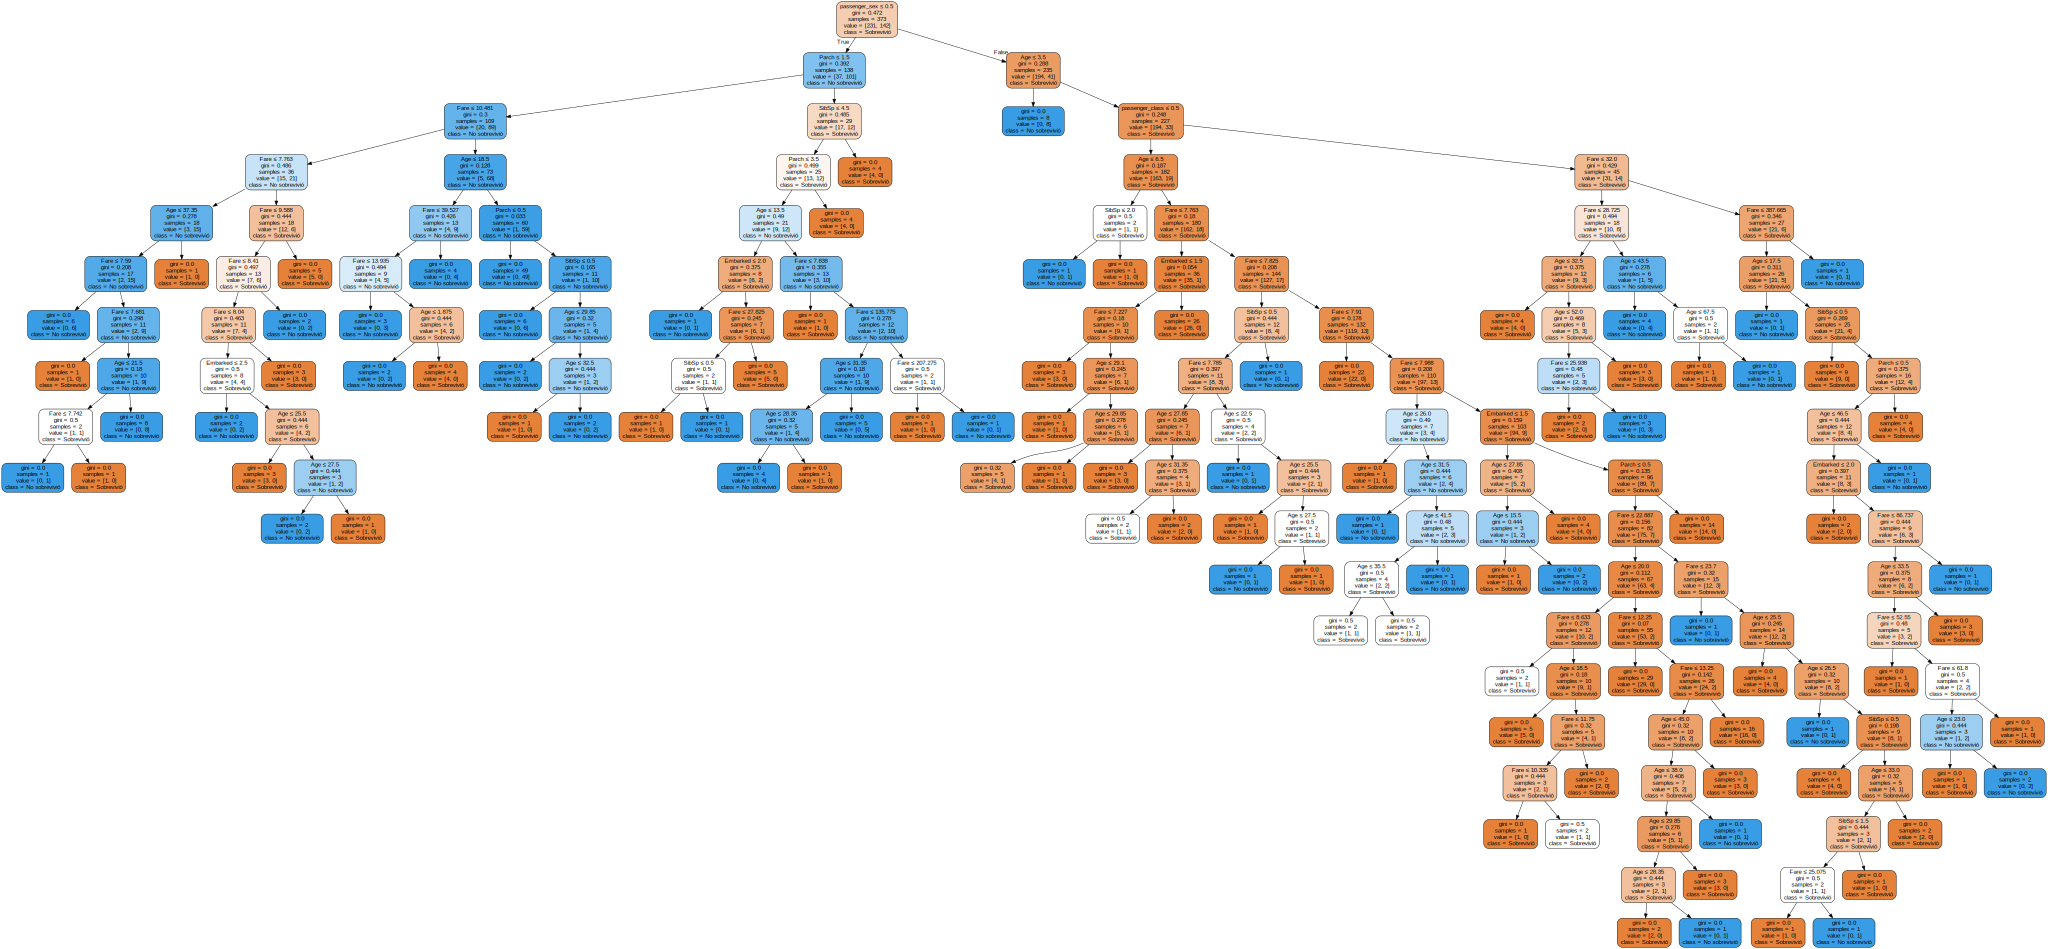

In [129]:
#PRUEBA 

y_tree = arbol.predict(X_validate[:1])

import graphviz 
dot_data = tree.export_graphviz(arbol, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("titanic") 
dot_data = tree.export_graphviz(arbol, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=["Sobrevivió","No sobrevivió"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [130]:
#import sys
#!conda install --yes --prefix  {sys.prefix} python-graphviz